# Contraste Bilateral:  Cálculo del Error de tipo II

## Parámetro $p$ en variables de $Bernoulli$

#### Autor:
Sergio García Prado - [garciparedes.me](https://garciparedes.me)

#### Fecha:
Abril de 2018

#### Agradecimientos:
Me gustaría agradecer a la profesora [Pilar Rodríguez del Tío](http://www.eio.uva.es/~pilar/) la revisión y correcciones sobre este trabajo.

## Descripción:

Las variables aleatorias de $Bernoulli$ surjen cuando se pretende estudiar sucesos de carácter binario, es decir, la ocurrencia o no de un determinado fenómeno. Estas variables se caracterizan por el ratio de frecuencia del fenómeno de estudio, el cual se denota por $p \in [0, 1]$. 


Sin embargo, este parámetro es desconocido en la mayoría de casos, por lo que es habitual que surja la pregunta sobre qué valor es el que toma. Para ello existen distintas técnicas, entre las que se encuentran los contrastes de hipótesis. Los contrastes se caracterizan por dos parámetros de error conocidos como $\alpha$ y $\beta$ que representan la probabilidad de rechazar la hipótesis cuando era cierta y de aceptarla cuando era falsa.

Estos errores están relacionados entre si, y cuando uno aumenta el otro decrece, por lo que es necesario estudiar su comportamiento en detalle para llegar a extraer conclusiones razonables de nuestros datos.

En este trabajo nos hemos centrado en estudiar la variación del error de tipo II (probabilidad de a aceptar la hipótesis $p = c$ cuando en realidad era falsa) en el contraste bilateral para el parámetro p sobre una muestra aleatoria simple de variables de de Bernoulli igualmente distribuidas.

## Procedimiento:

Sea: 

$$X_1,..., X_i,..., X_n \ m.a.s \mid X_i \sim B(p) $$

Sabemos que:

$$\widehat{p} = \bar{X} = \frac{\sum_{i = 1}^nX_i}{n}$$

Para realizar el contraste:

$$H_0: p = c\\H_1:p \neq c$$

Sabemos que:

\begin{align}
\widehat{p} \simeq N(p, \frac{p(1-p)}{n}) &\quad \text{(bajo cualquier hipótesis)}\\
\widehat{p} \simeq N(c, \frac{c(1-c)}{n}) &\quad \text{(bajo $H_0$)}
\end{align}

Si tipificamos para en ambos casos:

\begin{align}
\frac{\widehat{p} - p}{\sqrt{\frac{p(1-p)}{n}}} \simeq N(0, 1) &\quad \text{(bajo cualquier hipótesis)}\\
\frac{\widehat{p} - c}{\sqrt{\frac{c(1-c)}{n}}} \simeq N(0, 1) &\quad \text{(bajo $H_0$)}
\end{align}

Ahora, queremos construir la región crítica o de rechazo tal que: 

$$P_{H_0}(C) = \alpha$$

Por lo tanto:

\begin{align}
C 
&= \left\{ \left| \ N(0,1) \ \right| > Z_{1 - \frac{\alpha}{2}}\right\} \\
&= \left\{ \left| \ \frac{\widehat{p} - c}{\sqrt{\frac{c(1-c)}{n}}} \ \right| > Z_{1 - \frac{\alpha}{2}} \right\} \\
&= \left\{ \left| \ \widehat{p} - c \ \right| > Z_{1 - \frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}}\right\} \\
&= \left\{ \widehat{p} < c - Z_{1 - \frac{\alpha}{2}}  \sqrt{\frac{c(1-c)}{n}}\right\} \cup \left\{c + Z_{1 - \frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}} < \widehat{p}\right\}  \\
\end{align}

Sin embargo, buscamos calcular el error de tipo II: 

$$\beta\left(p\right) = P_p(\bar{C})$$

Luego, obtenemos el complementario de la región crítica:

\begin{align}
\bar{C} 
&= \left\{ \left| \ N(0,1) \ \right| < Z_{1 - \frac{\alpha}{2}}\right\} \\
&= \left\{ \left| \ \frac{\widehat{p} - c}{\sqrt{\frac{c(1-c)}{n}}} \ \right| < Z_{1 - \frac{\alpha}{2}} \right\} \\
&= \left\{ \left| \ \widehat{p}  - c\ \right| < \pm Z_{1 - \frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}}\right\} \\
&= \left\{ c - Z_{1-\frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}} < \widehat{p} < c + Z_{1 - \frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}}\right\} \\
\end{align}

Para después desarrollar el cálculo de dicha probabilidad:

\begin{align}
\beta(p) 
&= P_p(\bar{C}) \\
&= P_p\left(\left| \frac{\widehat{p} - c}{\sqrt{\frac{c(1-c)}{n}}} \right| < Z_{1 - \frac{\alpha}{2}}\right) \\
&= P_p\left(c - Z_{\frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}} < \widehat{p} < c + Z_{ 1- \frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}}\right) \\
&= \Phi\left(c + Z_{1 - \frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}}\right) - \Phi\left(c - Z_{1 - \frac{\alpha}{2}} \sqrt{\frac{c(1-c)}{n}}\right)
\end{align}

A continuación se muestra la implementación de los cálculos superiores en __R__:

## Implementación:

#### Cálculo del varlor crítico de nivel $1-\alpha/2$ para variables de Bernoulli:

In [1]:
CriticalValue <- function(n, p, alpha) {
  qnorm(alpha / 2) * sqrt((p * (1 - p)) / n)
}

#### Cálculo de la probabilidad $P(\bar{C})$:

In [2]:
PNegateC <- function(p, n, c, alpha) {
  pnorm(
    (
      c - CriticalValue(n, c, alpha)  - p
    ) / sqrt((p * (1 - p)) / n)
  ) - 
  pnorm(
    (
      c + CriticalValue(n, c, alpha)  - p
    ) / sqrt((p * (1 - p)) / n)
  )
}

#### Representación gráfica de $\beta(p)$ tomando distintos valores $c$ y $n$ (manteniendo $\alpha$ fijo) para comprobar su variación 

In [3]:
n.vec <- 10 ^ (1:3)
c.vec <- c(0.25, 0.5, 0.75)
p <- seq(0, 1, length = 200)

## Resultados:

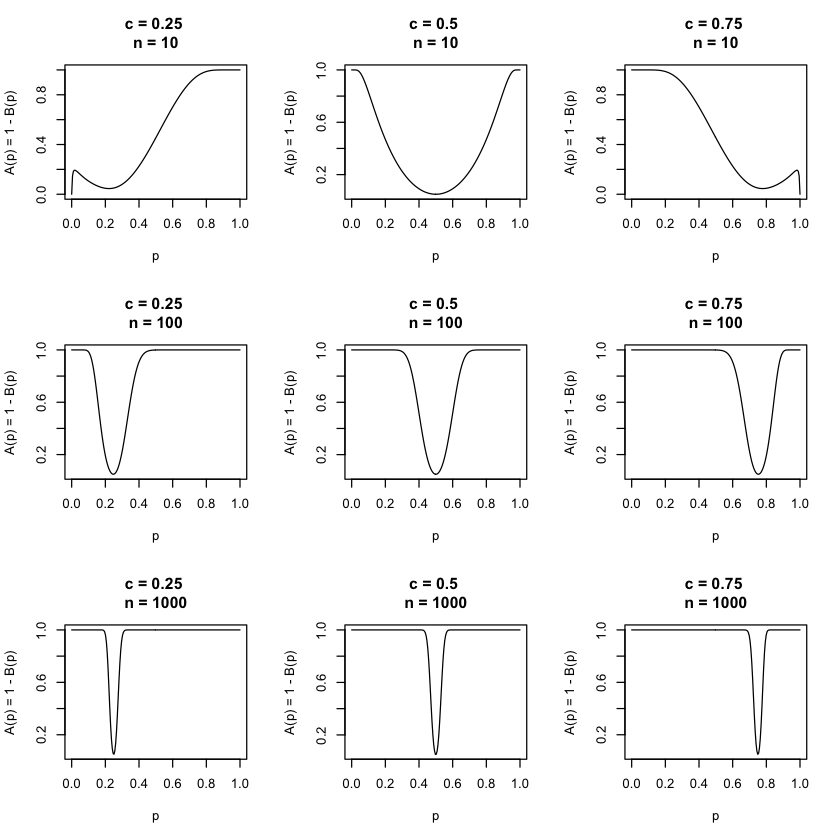

In [4]:
par(mfrow = c(length(n.vec), length(c.vec)))
for (n in n.vec) {
  for (c in c.vec) {
    plot(p, 1 - PNegateC(p, n, c, 0.05), type = "l", 
         main = paste("c =", c, "\nn =", n),
         ylab = "A(p) = 1 - B(p)")
  }
}

Tal y como se puede apreciar, la función del error tan solo es simétrica en el caso $c = \frac{1}{2}$, lo cual se puede apreciar para para valores de $n$ pequeños. Además, conforme aumenta $n$ la función se vuelve mucho más apuntada (degenera en c) por lo que el error se de tipo II se mantiene muy bajo excepto para valores $p \simeq c$ mientras que el error de tipo I actua de manera opuesta.